In [1]:
# numpy
import numpy as np
from numpy import column_stack

# pandas
import pandas as pd

# matplotlib 
import matplotlib.pyplot as plt


# sklearn
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

# sklearn
from sklearn.svm import SVC
from sklearn.metrics.pairwise import polynomial_kernel
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, RobustScaler
from sklearn.tree import DecisionTreeClassifier

# time
import time

# Ignore Warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
wis_bre_can_data = pd.read_csv('wisconson-breast-cancer.csv').drop(['id', 'Unnamed: 32'], axis=1)

In [3]:
wis_bre_can_data.shape

(569, 31)

In [4]:
def split(df):
    
    train_point = int(df.shape[0] * 70 / 100)
    val_point = train_point + int(df.shape[0] * 0.10)
    
    bre_train_data_x = df.iloc[:train_point,:].drop('diagnosis', axis=1)
    bre_train_data_y = df.iloc[:train_point,:]['diagnosis']

    
    bre_val_data_x = df.iloc[train_point:val_point,:].drop('diagnosis', axis=1)
    bre_val_data_y = df.iloc[train_point:val_point,:]['diagnosis']
    
    bre_test_data_x = df.iloc[val_point:,:].drop('diagnosis', axis=1)
    bre_test_data_y = df.iloc[val_point:,:]['diagnosis']
    
    return bre_train_data_x, bre_train_data_y, bre_val_data_x, bre_val_data_y, bre_test_data_x, bre_test_data_y

In [5]:
bre_train_data_x, bre_train_data_y, bre_val_data_x, bre_val_data_y, bre_test_data_x, bre_test_data_y = split(wis_bre_can_data)

In [6]:
# Scale data input features
scaler = MinMaxScaler().fit(bre_train_data_x)
bre_train_data_x = scaler.transform(bre_train_data_x)
bre_test_data_x = scaler.transform(bre_test_data_x)
bre_val_data_x = scaler.transform(bre_val_data_x)

In [7]:
# wis_bre_can_data.info()

In [8]:
model = DecisionTreeClassifier(criterion='entropy', random_state=4)

In [9]:
fitted_model = model.fit(bre_train_data_x, bre_train_data_y)
fitted_model_val = model.fit(bre_val_data_x, bre_val_data_y)
fitted_model_test = model.fit(bre_test_data_x, bre_test_data_y)

In [10]:
train_pred_data = fitted_model.predict(bre_train_data_x)
test_pred_data = fitted_model.predict(bre_test_data_x)
val_pred_data = fitted_model.predict(bre_val_data_x)

In [11]:
print('Testing Data Accuracy by Decision Tree %.2f %%' % (accuracy_score(bre_test_data_y, test_pred_data) * 100)) 

print('Training Data Accuracy by Decision Tree %.2f %%' % (accuracy_score(bre_train_data_y, train_pred_data) * 100)) 

print('Validation Data Accuracy by Decision Tree %.2f %%' % (accuracy_score(bre_val_data_y, val_pred_data) * 100)) 

Testing Data Accuracy by Decision Tree 100.00 %
Training Data Accuracy by Decision Tree 90.70 %
Validation Data Accuracy by Decision Tree 91.07 %


In [12]:
t_depth = model.tree_.max_depth

In [13]:
accuracy_train_data = {}
accuracy_test_data = {}
accuracy_val_data = {}
for i in range(0, t_depth):
    prune_model = DecisionTreeClassifier(criterion='entropy', random_state=4, max_depth=t_depth-i).fit(bre_train_data_x, bre_train_data_y)
    
    accuracy_train_data[t_depth-i] = 1 - accuracy_score(prune_model.predict(bre_train_data_x), bre_train_data_y)
    accuracy_test_data[t_depth-i] = 1 - accuracy_score(prune_model.predict(bre_test_data_x), bre_test_data_y) 
    accuracy_val_data[t_depth-i] = 1 - accuracy_score(prune_model.predict(bre_val_data_x), bre_val_data_y)

In [14]:
data_label_so_accu_x, data_label_so_accu_y   = zip(*sorted(accuracy_train_data.items()))
test_label_so_accu_x,  test_label_so_accu_y = zip(*sorted(accuracy_test_data.items()))
val_label_so_accu_x,  val_label_so_accu_y = zip(*sorted(accuracy_val_data.items()))

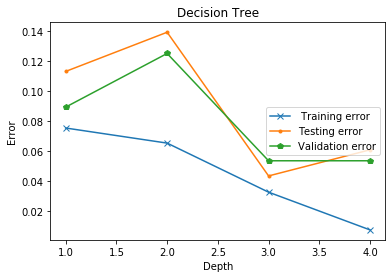

In [17]:
plt.plot(data_label_so_accu_x, data_label_so_accu_y, label= ' Training error', marker='x')
plt.plot(test_label_so_accu_x,  test_label_so_accu_y, label= 'Testing error', marker='.')
plt.plot(val_label_so_accu_x,  val_label_so_accu_y, label=  'Validation error', marker='p')
plt.legend(loc='center right')
plt.ylabel('Error')
plt.xlabel('Depth')
plt.title('Decision Tree')
plt.savefig('tree_depth_error_new.jpg', dpi=300)
plt.show()